# Primeira Parte

In [1]:
import pandas as pd

In [2]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
 

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


In [4]:
last_date = "2/4/22"

confirmed[last_date]

0       165358
1       263172
2       256806
3        36599
4        98340
        ...   
275    2315689
276     556550
277      11145
278     306777
279     230170
Name: 2/4/22, Length: 280, dtype: int64

In [5]:
confirmed['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
275               Vietnam
276    West Bank and Gaza
277                 Yemen
278                Zambia
279              Zimbabwe
Name: Country/Region, Length: 280, dtype: object

In [6]:
confirmed.shape

(280, 750)

In [7]:
confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 196, dtype: int64

In [8]:
confirmed.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
41,Diamond Princess,Canada,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17493,17578,17609,17627,17639,17663,17663,17663,17706,17716,17724,17729,17733,17733
214,NaN,Portugal,39.399900,-8.224500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1303291,1330158,1358817,1389646,1412936,1424016,1434570,1460406,1499976,1539050,1577784,1613427,1639846,1660058,1693398,1734343,1774477,1814567,1852703,1884974,1906891,1950620,2003169,2059595,2118125,2176256,2221825,2254583,2312240,2377818,2443524,2507357,2566551,2611886,2639802,2690690,2745383,2795830,2843029,2884540
202,NaN,Nigeria,9.082000,8.675300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,239019,240387,241513,241513,242877,242877,244120,244548,245404,246195,247009,247775,248312,248732,249154,249586,250009,250009,250628,250929,251178,251341,251571,251571,251930,251959,252187,252428,252678,252753,252753,252912,253001,253023,253181,253340,253405,253405,253540,253685
27,NaN,Bolivia,-16.290200,-63.588700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,580690,585624,591773,599753,599753,611031,622312,622312,631554,641817,652819,671832,677166,686023,697236,711299,711299,725459,725459,749070,754335,763392,774227,795087,804677,804677,804677,820583,828232,835170,841757,841757,847180,852280,855705,859530,863675,867071,867071,871749
144,NaN,Honduras,15.200000,-86.241900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,379402,379402,379402,379402,379402,379402,379402,379402,379402,379402,379402,381254,381254,381254,382440,382440,382440,382440,382440,382440,385362,385964,385964,387515,387515,387515,387515,387515,391145,391145,391874,391874,391874,391874,391874,391874,391874,391874,391874,391874
205,NaN,Oman,21.512583,55.923255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,...,305253,305357,305489,305489,305489,305832,306008,306240,306492,306755,306755,306755,307722,308261,308870,309588,310338,310338,310338,312425,313538,314853,316472,318272,318272,318272,322438,324085,326164,328326,330767,330767,330767,336460,338880,341708,344043,346041,346041,346041
263,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23627,25998,26799,27507,27507,27507,27507,30024,30825,31704,32409,32409,32409,34154,34690,35126,35532,35903,35903,35903,36852,37244,37613,37952,38232,38232,38232,39152,39628,40101,40543,40947,40947,40947,42052,42467,43032,43452,43739,43739
182,NaN,Mauritius,-20.348404,57.552152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68395,68431,68480,68480,68552,68612,68661,68661,68763,68864,68945,69021,69110,69110,69323,69423,69484,69557,69666,69668,69909,69962,69962,70094,70134,70218,70218,70218,70440,70514,70629,70734,70734,70734,70862,70862,70862,70862,70862,70862
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,1

In [9]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
2/1/22                 163555
2/2/22                 164190
2/3/22                 164727
2/4/22                 165358
2/5/22                 165711
Name: 0, Length: 750, dtype: object

In [10]:
confirmed.set_index('Province/State').loc['Zhejiang']

Country/Region       China
Lat                29.1832
Long              120.0934
1/22/20                 10
1/23/20                 27
                    ...   
2/1/22                2233
2/2/22                2234
2/3/22                2236
2/4/22                2238
2/5/22                2240
Name: Zhejiang, Length: 749, dtype: object

In [11]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


In [12]:
confirmed_by_country.sample(15)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kuwait,29.311660,47.481766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,26,43,45,...,415678,416077,416631,417135,417723,418332,419314,420796,423042,425455,428100,430920,433919,437602,441999,446547,451430,456311,460828,465331,470478,475303,479640,484150,488959,493107,497454,502630,508372,514826,521341,528254,534062,539654,545717,552153,558745,564735,570142,574587
Iceland,64.963100,-19.020800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,25314,25314,27059,27059,27059,27059,31070,32540,33901,35239,36447,36447,36447,40037,40037,40037,43768,44974,44974,44974,48482,49972,51535,53121,54579,54579,54579,58409,60096,61737,63188,64486,64486,64486,67673,69177,70721,72136,73530,73530
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287,2263053,2275727,2286750,2295494,2304095,2315689,2327859
Nepal,28.166700,84.250000,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,827763,827972,828207,828431,828773,828986,829277,829632,830002,830480,831052,831748,832589,833946,835927,838375,841297,845501,849204,853738,859485,868215,877717,887769,896584,904796,910394,918448,927880,933451,939267,944074,947392,950441,953913,957570,959775,962517,964119,965222
Kenya,-0.023600,37.906200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,285654,288951,292237,295028,297155,298509,299732,302134,304350,306686,309130,310797,311538,312572,313677,314490,315665,316700,317324,317634,317857,318249,319011,319379,319838,320138,320229,320399,320584,320766,320918,321111,321234,321335,321381,321552,321671,321764,321922,322043
Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,22259270,22269031,22281649,22291839,22295621,22297427,22309081,22328252,22351104,22386930,22450222,22499525,22529183,22563104,22636359,22724232,22822177,22933289,22981851,23015128,23089509,23229851,23425392,23595178,23766499,23931609,24054405,24142032,24342322,24560093,24789795,25050601,25256198,25360647,25463530,25634781,25820745,26107894,26326454,26484546
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145,11145,11149
Honduras,15.200000,-86.241900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,379402,379402,379402,379402,379402,379402,379402,379402,379402,379402,379402,381254,381254,381254,382440,382440,382440,382440,382440,382440,385362,385964,385964,387515,387515,387515,387515,387515,391145,391145,391874,391874,391874,391874,391874,391874,391874,391874,391874,391874
Bhutan,27.514200,90.433600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2660,2660

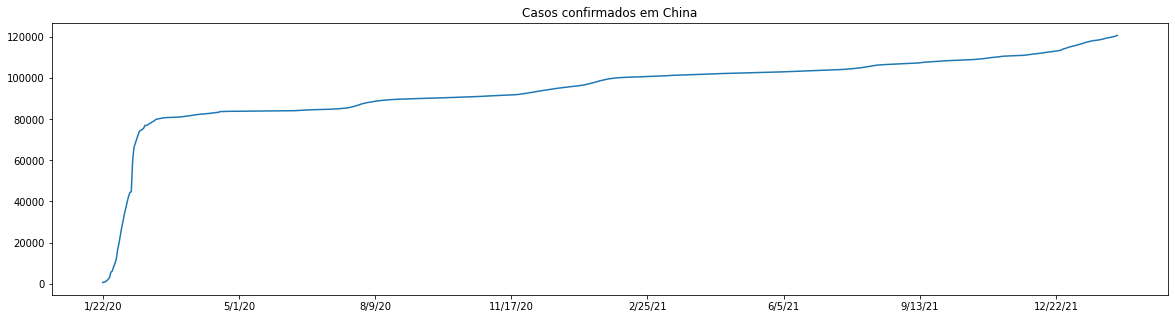

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,5))
confirmed_by_country.loc['China'][2:].plot()
plt.title('Casos confirmados em China')
plt.show()

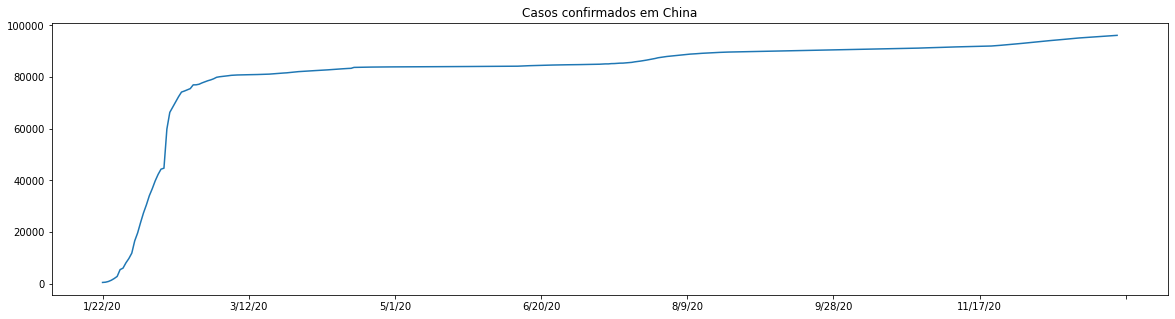

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,5))
confirmed_by_country.loc['China'][2:350].plot()
plt.title('Casos confirmados em China')
plt.show()

In [15]:
new_cases_china = confirmed_by_country.loc["China"][2:60].diff()
new_cases_china

1/22/20        NaN
1/23/20       95.0
1/24/20      277.0
1/25/20      486.0
1/26/20      669.0
1/27/20      802.0
1/28/20     2632.0
1/29/20      578.0
1/30/20     2054.0
1/31/20     1661.0
2/1/20      2089.0
2/2/20      4739.0
2/3/20      3086.0
2/4/20      3991.0
2/5/20      3733.0
2/6/20      3147.0
2/7/20      3523.0
2/8/20      2704.0
2/9/20      3015.0
2/10/20     2525.0
2/11/20     2032.0
2/12/20      373.0
2/13/20    15136.0
2/14/20     6463.0
2/15/20     2055.0
2/16/20     2100.0
2/17/20     1921.0
2/18/20     1777.0
2/19/20      408.0
2/20/20      458.0
2/21/20      473.0
2/22/20     1451.0
2/23/20       21.0
2/24/20      219.0
2/25/20      513.0
2/26/20      412.0
2/27/20      434.0
2/28/20      328.0
2/29/20      428.0
3/1/20       576.0
3/2/20       204.0
3/3/20       125.0
3/4/20       125.0
3/5/20       151.0
3/6/20       153.0
3/7/20        80.0
3/8/20        53.0
3/9/20        37.0
3/10/20       27.0
3/11/20       34.0
3/12/20       11.0
3/13/20       13.0
3/14/20     

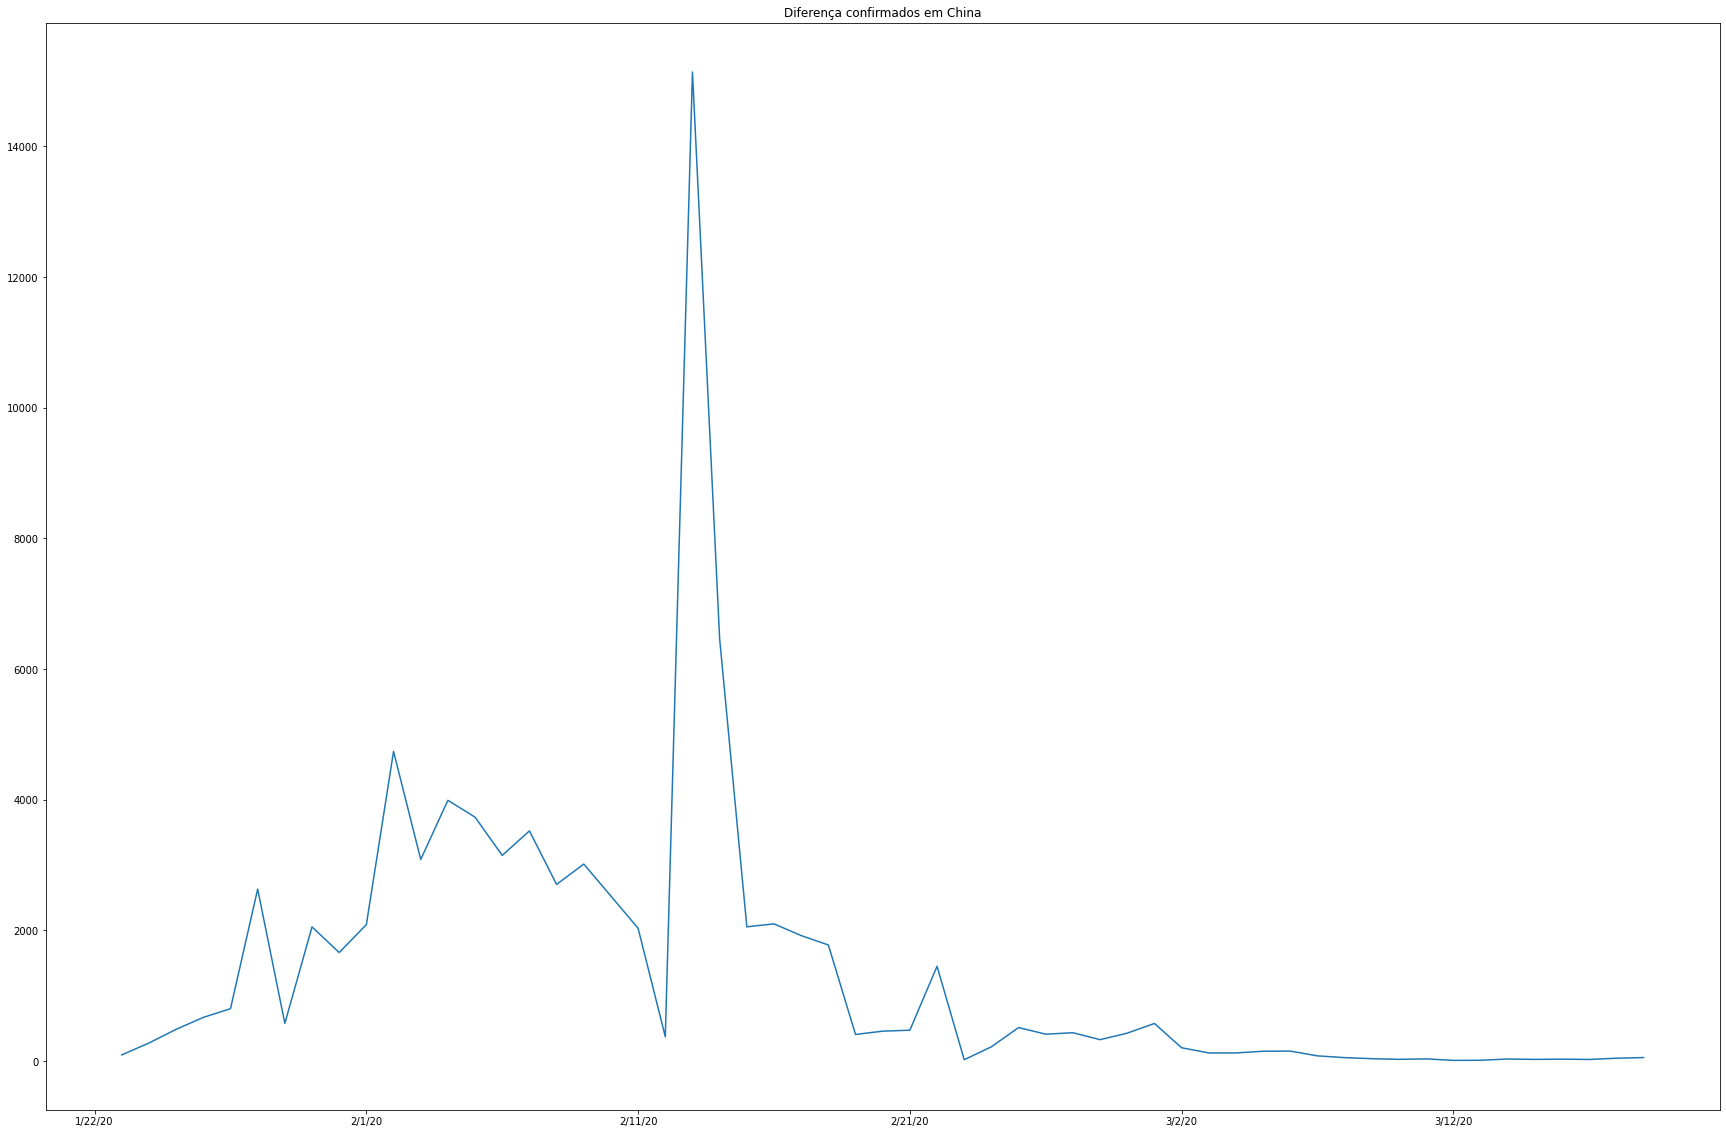

In [16]:
plt.figure(figsize=(30,20))
new_cases_china.plot()
plt.title('Diferença confirmados em China')
plt.show()

In [17]:
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


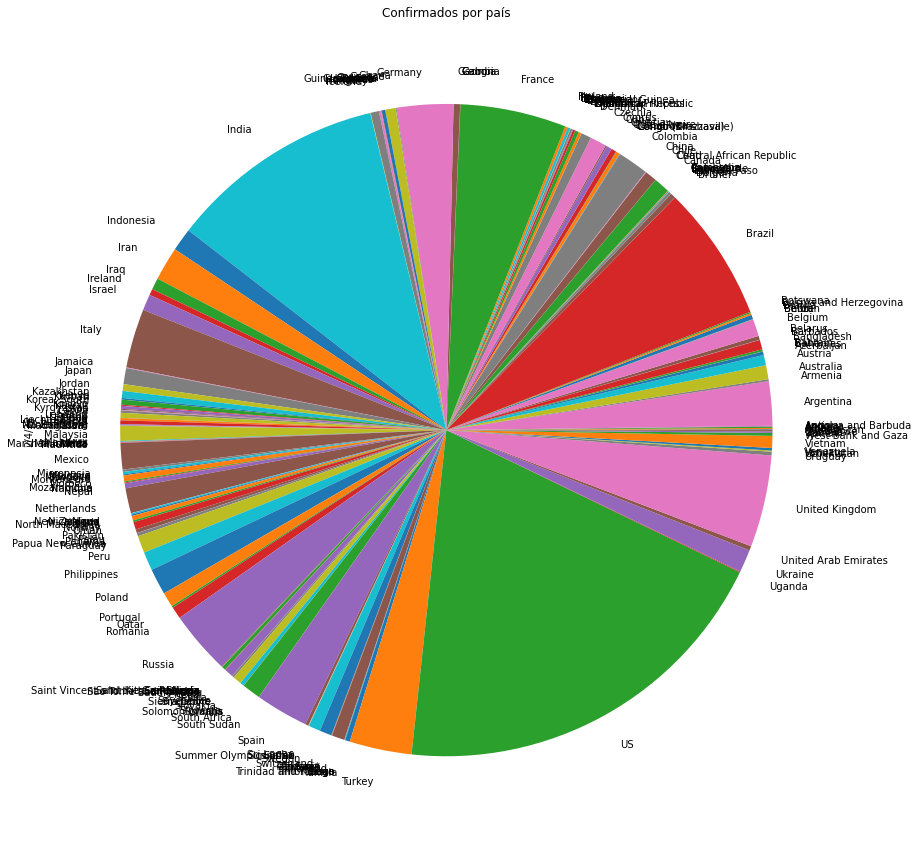

In [18]:
plt.figure(figsize=(20,15))
plt.title('Confirmados por país')
confirmed_by_country[last_date].plot(kind='pie')
plt.show()

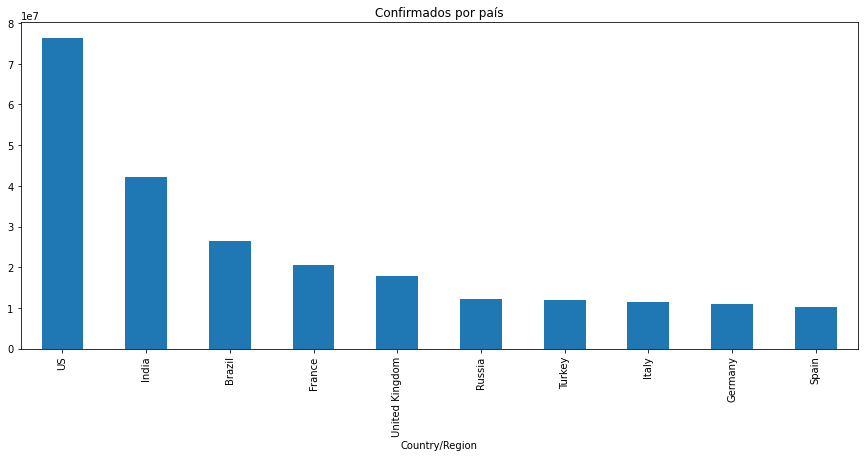

In [19]:
plt.figure(figsize=(15,6))
plt.title('Confirmados por país')
confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.show()

In [20]:
confirmed.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    165358
Albania        263172
Algeria        256806
Andorra         36599
Angola          98340
Name: 2/4/22, dtype: int64

In [21]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:, -3]

In [22]:
informations = [latest_by_country(confirmed),latest_by_country(deaths),latest_by_country(recovered)]
combined = pd.concat(informations,axis=1)
combined.columns = ['confirmed','deaths','recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,164727,7420,0
Albania,261240,3362,0
Algeria,255836,6618,0
Andorra,36470,147,0
Angola,98319,1896,0
...,...,...,...
Vietnam,2304095,38063,0
West Bank and Gaza,556550,5128,0
Yemen,11145,2020,0


In [23]:
sum_up = combined.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
print(letality_rate_1 * 100)

1.4719900438937972


In [24]:
letality_rate_1 = combined['deaths'] / combined['confirmed'] * 100
combined['letality_rate_1'] = letality_rate_1
combined.head()

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Afghanistan,164727,7420,0,4.504422
Albania,261240,3362,0,1.286939
Algeria,255836,6618,0,2.586813
Andorra,36470,147,0,0.403071
Angola,98319,1896,0,1.928417


In [25]:
letality_rate_2 = combined['deaths'] / (combined['recovered'] + combined['deaths'])
letality_rate_2
combined['letality_rate_2'] = letality_rate_2

In [26]:
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,164727,7420,0,4.504422,1.0
Albania,261240,3362,0,1.286939,1.0
Algeria,255836,6618,0,2.586813,1.0
Andorra,36470,147,0,0.403071,1.0
Angola,98319,1896,0,1.928417,1.0


In [27]:
combined.sort_values('letality_rate_1', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,1.0
Yemen,11145,2020,0,18.124720,1.0
Vanuatu,7,1,0,14.285714,1.0
Peru,3308693,206406,0,6.238294,1.0
Mexico,5027870,307493,0,6.115771,1.0
Sudan,58874,3588,0,6.094371,1.0
Syria,51656,2998,0,5.803779,1.0
Egypt,432761,22780,0,5.263875,1.0
Somalia,26067,1335,0,5.121418,1.0


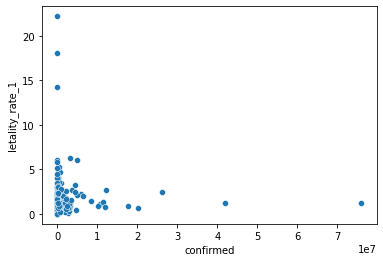

In [28]:
import seaborn as sns

sns.scatterplot(data=combined, x='confirmed', y='letality_rate_1')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


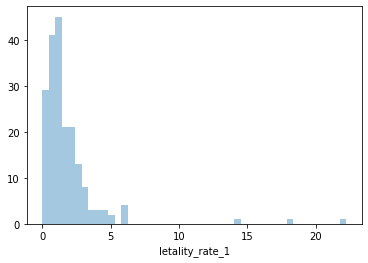

In [29]:
sns.distplot(combined["letality_rate_1"], kde=False)

In [30]:
combined.sort_values('letality_rate_1', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,1.0
Yemen,11145,2020,0,18.124720,1.0
Vanuatu,7,1,0,14.285714,1.0
Peru,3308693,206406,0,6.238294,1.0
Mexico,5027870,307493,0,6.115771,1.0
Sudan,58874,3588,0,6.094371,1.0
Syria,51656,2998,0,5.803779,1.0
Egypt,432761,22780,0,5.263875,1.0
Somalia,26067,1335,0,5.121418,1.0


In [31]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc["China"]
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [32]:
display(sum_up)

confirmed    75077
deaths        2238
recovered    18014
Name: China, dtype: int64

In [33]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [34]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
letality_rate_2 = combined["deaths"] / (combined["recovered"] + combined["deaths"]) * 100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,164727,7420,0,4.504422,100.0
Albania,261240,3362,0,1.286939,100.0
Algeria,255836,6618,0,2.586813,100.0
Andorra,36470,147,0,0.403071,100.0
Angola,98319,1896,0,1.928417,100.0


In [35]:
combined.sort_values("letality_rate_1", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,100.0
Yemen,11145,2020,0,18.124720,100.0
Vanuatu,7,1,0,14.285714,100.0
Peru,3308693,206406,0,6.238294,100.0
Mexico,5027870,307493,0,6.115771,100.0
Sudan,58874,3588,0,6.094371,100.0
Syria,51656,2998,0,5.803779,100.0
Egypt,432761,22780,0,5.263875,100.0
Somalia,26067,1335,0,5.121418,100.0


# Segunda Parte

In [36]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287,2263053,2275727,2286750,2295494,2304095,2315689,2327859
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550,556550,556550
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10

In [37]:
is_china = confirmed['Country/Region'] == 'China'
is_china

0      False
1      False
2      False
3      False
4      False
       ...  
275    False
276    False
277    False
278    False
279    False
Name: Country/Region, Length: 280, dtype: bool

In [38]:
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,False


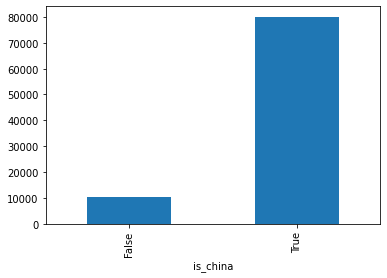

In [39]:
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind='bar')

In [40]:
import numpy as np

In [41]:

confirmed['is_china_label'] = np.where(confirmed['is_china'], 'China', 'Others')

In [42]:
display(confirmed.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,False,Others


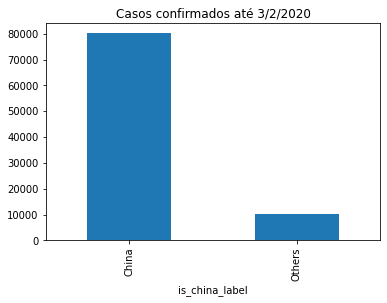

In [43]:
summed = confirmed.groupby('is_china_label').sum()['3/2/20'].plot(kind='bar')
plt.title('Casos confirmados até 3/2/2020')
plt.show()

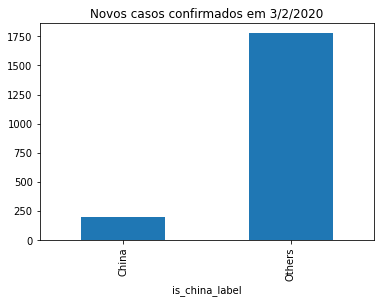

In [44]:
summed = confirmed.groupby('is_china_label').sum()
summed['delta'] = summed['3/2/20'] - summed['3/1/20']
summed['delta'].plot(kind='bar')
plt.title('Novos casos confirmados em 3/2/2020')
plt.show()

In [45]:
summed.T

is_china_label,China,Others
Lat,1085.2923,4.518087e+03
Long,3688.9377,2.368392e+03
1/22/20,548.0000,9.000000e+00
1/23/20,643.0000,1.200000e+01
1/24/20,920.0000,2.100000e+01
...,...,...
2/3/22,120362.0000,3.879896e+08
2/4/22,120611.0000,3.910088e+08
2/5/22,120907.0000,3.930963e+08
is_china,34.0000,0.000000e+00


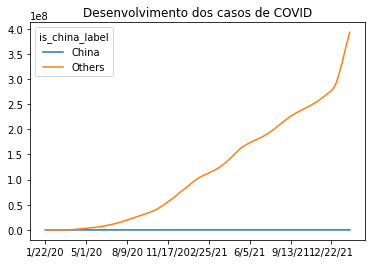

In [46]:
summed.T[2:-2].plot()
plt.title("Desenvolvimento dos casos de COVID")
plt.show()

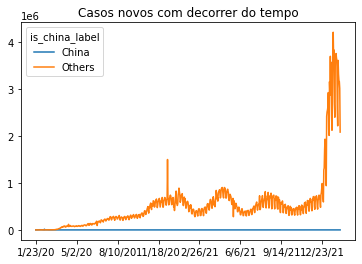

In [47]:
differences = summed.T[2:-2].diff().dropna()
differences.plot()
plt.title("Casos novos com decorrer do tempo")
plt.show()

In [48]:
cases = confirmed.groupby('is_china_label').sum()['3/2/20'].loc["China"]
estimated_population = 1437525528
incidence_ratio = cases / estimated_population * 100000
incidence_ratio 

5.574579264097771

In [53]:
un_population = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv")
un_population["PopTotal"] = un_population["PopTotal"]  * 1000
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [51]:
un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+05,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+06,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e-01,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+03,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+04,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+05,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+07,56025.839000


In [56]:
un_population_total = un_population.query("Time==2019")[["Location","PopTotal"]].set_index("Location")
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [57]:
combined.join(un_population_total)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Afghanistan,164727,7420,0,4.504422,100.0,38041757.0
Albania,261240,3362,0,1.286939,100.0,2880913.0
Algeria,255836,6618,0,2.586813,100.0,43053054.0
Andorra,36470,147,0,0.403071,100.0,77146.0
Angola,98319,1896,0,1.928417,100.0,31825299.0
...,...,...,...,...,...,...
Vietnam,2304095,38063,0,1.651972,100.0,NaN
West Bank and Gaza,556550,5128,0,0.921391,100.0,NaN
Yemen,11145,2020,0,18.124720,100.0,29161922.0
Zambia,306347,3925,0,1.281227,100.0,17861034.0


In [60]:
combined.join(un_population_total).sort_values("confirmed", ascending=False).head(20)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
US,75982593,897237,0,1.180845,100.0,NaN
India,41952712,500055,0,1.191949,100.0,1.366418e+09
Brazil,26107894,630301,0,2.414216,100.0,2.110495e+08
France,20274710,132847,0,0.655235,100.0,6.512973e+07
United Kingdom,17727681,158266,0,0.892762,100.0,6.753016e+07
Russia,12090707,326642,0,2.701596,100.0,NaN
Turkey,11940695,88064,0,0.737512,100.0,8.342961e+07
Italy,11348701,147734,0,1.301770,100.0,6.055009e+07
Germany,10723644,118508,0,1.105109,100.0,8.351705e+07
Spain,10199716,94040,0,0.921986,100.0,4.673678e+07


In [66]:
un_population.query("Location.str.contains('China') and Time==2019", engine='python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47893,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1.433784e+09,152.722
48777,1105,China (and dependencies),2,Medium,2019,2019.5,751174.575,714459.601,1.465634e+09,155.510
48928,344,"China, Hong Kong SAR",2,Medium,2019,2019.5,3418.487,4017.670,7.436157e+06,7082.054
49812,446,"China, Macao SAR",2,Medium,2019,2019.5,307.706,332.740,6.404460e+05,21419.599
50696,158,"China, Taiwan Province of China",2,Medium,2019,2019.5,11824.123,11949.758,2.377388e+07,671.389
140008,948,"Less developed regions, excluding China",2,Medium,2019,2019.5,2518843.362,2458360.347,4.977204e+09,69.541
208293,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2019,2019.5,8421.200,7569.584,1.599078e+07,37.205


In [67]:
# vou assumir algumas premissas
# estou assumindo que na UN China = John Hokpins Mainland China

def rename_location(location):
  if location=='China':
    return 'Mainland China'
  if location=='Republic of Korea':
    return 'South Korea'
  if location=='Iran (Islamic Republic of)':
    return 'Iran'
  if location=='China, Hong Kong SAR':
    return 'Hong Kong'
  if location=='United States of America':
    return 'US'
  return location

un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
un_population_total.query("location_for_who=='South Korea'").head()

,PopTotal,location_for_who
Location,,
Republic of Korea,51225321.0,South Korea


In [68]:
un_population_total = un_population_total.set_index("location_for_who")
un_population_total.head()

,PopTotal
location_for_who,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [69]:
combined_expanded = combined.join(un_population_total).sort_values("confirmed", ascending=False).dropna()
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
US,75982593,897237,0,1.180845,100.0,3.290649e+08
India,41952712,500055,0,1.191949,100.0,1.366418e+09
Brazil,26107894,630301,0,2.414216,100.0,2.110495e+08
France,20274710,132847,0,0.655235,100.0,6.512973e+07
United Kingdom,17727681,158266,0,0.892762,100.0,6.753016e+07
Turkey,11940695,88064,0,0.737512,100.0,8.342961e+07
Italy,11348701,147734,0,1.301770,100.0,6.055009e+07
Germany,10723644,118508,0,1.105109,100.0,8.351705e+07
Spain,10199716,94040,0,0.921986,100.0,4.673678e+07
Argentina,8515285,122152,0,1.434503,100.0,4.478068e+07


In [70]:
# O cálculo de incidencia aqui está errado, pois assumi que a população em risco de Mainland China é todo mundo
# mas até agora 83% dos casos estão em Hubei
# Durante esse momento da epidemia é injusto com a localização (Mainland China) considerar essa incidência.

combined_expanded['incidence_ratio'] = combined_expanded['confirmed'] / combined_expanded['PopTotal'] * 100000
combined_expanded['mortality_rate'] = combined_expanded['deaths'] / combined_expanded['PopTotal'] * 100000
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidence_ratio,mortality_rate
US,75982593,897237,0,1.180845,100.0,3.290649e+08,23090.456951,272.662613
India,41952712,500055,0,1.191949,100.0,1.366418e+09,3070.269822,36.596055
Brazil,26107894,630301,0,2.414216,100.0,2.110495e+08,12370.506279,298.650764
France,20274710,132847,0,0.655235,100.0,6.512973e+07,31129.730906,203.972898
United Kingdom,17727681,158266,0,0.892762,100.0,6.753016e+07,26251.501163,234.363428
Turkey,11940695,88064,0,0.737512,100.0,8.342961e+07,14312.299230,105.554854
Italy,11348701,147734,0,1.301770,100.0,6.055009e+07,18742.665164,243.986417
Germany,10723644,118508,0,1.105109,100.0,8.351705e+07,12840.066206,141.896781
Spain,10199716,94040,0,0.921986,100.0,4.673678e+07,21823.744733,201.211970
Argentina,8515285,122152,0,1.434503,100.0,4.478068e+07,19015.535161,272.778380


In [71]:
confirmed.sort_values(last_date, ascending=False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,is_china,is_china_label
255,NaN,US,40.000000,-100.00000,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,...,54306641,54797005,54963778,55268644,56345834,57152289,57797669,58612942,59470146,59856640,60333614,61703251,62473818,63384166,64224943,65084721,65479434,65947775,66610143,67723872,68722784,69433776,70256649,70543266,70899566,71802940,72357997,73009708,73497946,74099283,74268633,74461453,74992871,75406916,75731527,75982593,76354040,76458144,False,Others
147,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,34838804,34861579,34889132,34922882,34960261,35018358,35109286,35226386,35368372,35528004,35707727,35875790,35875790,36317927,36317927,36850962,37122164,37380253,37618271,37901241,38218773,38566027,38903731,39237264,39543328,39799202,40085116,40371500,40622709,40858241,41092522,41302440,41469499,41630885,41803318,41952712,42080664,42188138,False,Others
30,NaN,Brazil,-14.235000,-51.92530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,22281649,22291839,22295621,22297427,22309081,22328252,22351104,22386930,22450222,22499525,22529183,22563104,22636359,22724232,22822177,22933289,22981851,23015128,23089509,23229851,23425392,23595178,23766499,23931609,24054405,24142032,24342322,24560093,24789795,25050601,25256198,25360647,25463530,25634781,25820745,26107894,26326454,26484546,False,Others
130,NaN,France,46.227600,2.21370,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,...,9529614,9761814,9980940,10039372,10106833,10371017,10693911,10952698,11275841,11579510,11875607,11963184,12322734,12655210,12956857,13279505,13604085,13882214,13971316,14432833,14864061,15254588,15652063,16041383,16342997,16446852,16948487,17310548,17696796,18048584,18380982,18630430,18713087,19112755,19378646,19649274,19890150,20104692,False,Others
270,NaN,United Kingdom,55.378100,-3.43600,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,...,12748050,12937886,13100458,13235401,13422815,13641520,13835334,14015065,14193228,14333794,14475192,14617314,14732594,14862138,14967817,15066395,15147120,15217280,15305410,15399300,15506750,15613283,15709059,15784488,15859288,15953685,16047716,16149319,16245474,16333980,16406123,16468522,17315893,17428345,17515199,17607832,17689885,17749999,False,Others


In [72]:
hubei_population = 59020000
confirmed_cases = confirmed.set_index("Province/State").loc["Hubei"][last_date]
death_cases = deaths.set_index("Province/State").loc["Hubei"][last_date]
recovered_cases = recovered.set_index("Province/State").loc["Hubei"][last_date]

letality_rate_1 = death_cases / confirmed_cases * 100
letality_rate_2 = death_cases / (death_cases + recovered_cases) * 100
print(f"Letality rate 1: {letality_rate_1}%")
print(f"Letality rate 2: {letality_rate_2}%")

Letality rate 1: 6.604215456674472%
Letality rate 2: 100.0%


In [73]:
# nos estados unidos de acordo com burden report de influenza 2018-2019 estimativa não final
letality_rate_hospitalization = 34157 / 490561 * 100

print(f"Letality rate hospitalização EUA influenza 2018-2019: {letality_rate_hospitalization}%")

Letality rate hospitalização EUA influenza 2018-2019: 6.962844579980879%


In [74]:
# nos estados unidos de acordo com burden report de influenza 2018-2019 estimativa não final
letality_rate_medical_visit = 34157 / 16520350 * 100

print(f"Letality rate visita médica EUA influenza 2018-2019: {letality_rate_medical_visit}%")

Letality rate visita médica EUA influenza 2018-2019: 0.20675712076317995%


In [75]:
# nos estados unidos de acordo com burden report de influenza 2018-2019 estimativa não final
letality_rate_symptomatic = 34157 / 35520883 * 100

print(f"Letality rate sintomáticos EUA influenza 2018-2019: {letality_rate_symptomatic}%")

Letality rate sintomáticos EUA influenza 2018-2019: 0.09616033475293956%


In [76]:
incidence_ratio = confirmed_cases / hubei_population * 100000
mortality_rate = death_cases / hubei_population * 100000

print(f"Coeficiente de incidencia em Hubei {incidence_ratio}")
print(f"Coeficiente de mortalidade em Hubei {mortality_rate}")

Coeficiente de incidencia em Hubei 115.75737038292105
Coeficiente de mortalidade em Hubei 7.64486614706879


In [77]:
# estados unidos, mesmo relatorio de burden, coeficiente de incidencia

incidence_ratio = 35520883 / 329450000 * 100000
mortality_rate = 34157 / 329450000 * 100000

print(f"Coeficiente de incidencia de influenza 2018-2019 em EUA  {incidence_ratio}")
print(f"Coeficiente de mortalidade de influenza 2018-2019 em EUA {mortality_rate}")

Coeficiente de incidencia de influenza 2018-2019 em EUA  10781.873728942177
Coeficiente de mortalidade de influenza 2018-2019 em EUA 10.367885870390044


In [78]:
grouped_per_day = pd.DataFrame([confirmed.sum()[2:-1],recovered.sum()[2:], deaths.sum()[2:]],
            index=["confirmed", "recovered", "deaths"]).T
grouped_per_day.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,confirmed,recovered,deaths
Long,6057.329414,7151.063898,6057.329414
1/22/20,557.000000,30.000000,17.000000
1/23/20,655.000000,32.000000,18.000000
1/24/20,941.000000,39.000000,26.000000
1/25/20,1434.000000,42.000000,42.000000


In [79]:
grouped_per_day["letality_rate_1"] = grouped_per_day["deaths"]/ grouped_per_day["confirmed"] * 100
grouped_per_day["letality_rate_2"] = grouped_per_day["deaths"] / (grouped_per_day["deaths"] + grouped_per_day["recovered"]) * 100
grouped_per_day.head()

,confirmed,recovered,deaths,letality_rate_1,letality_rate_2
Long,6057.329414,7151.063898,6057.329414,100.000000,45.859699
1/22/20,557.000000,30.000000,17.000000,3.052065,36.170213
1/23/20,655.000000,32.000000,18.000000,2.748092,36.000000
1/24/20,941.000000,39.000000,26.000000,2.763018,40.000000
1/25/20,1434.000000,42.000000,42.000000,2.928870,50.000000


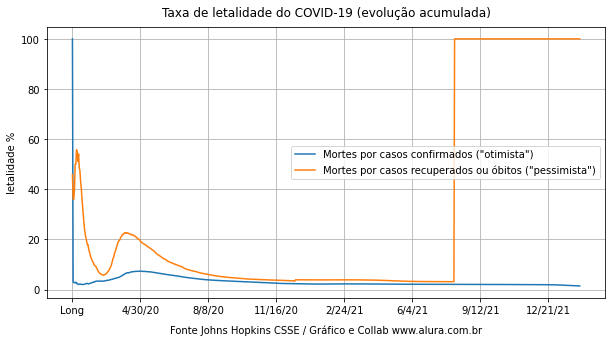

In [80]:
fig = plt.figure(figsize=(10,5))
grouped_per_day["letality_rate_1"].plot()
ax = grouped_per_day["letality_rate_2"].plot()
plt.legend(['Mortes por casos confirmados ("otimista")', 'Mortes por casos recuperados ou óbitos ("pessimista")'])
plt.title("Taxa de letalidade do COVID-19 (evolução acumulada)", pad=10)
plt.grid(linestyle='-')
ax.set_ylabel("letalidade %")
ax.set_xlabel("Fonte Johns Hopkins CSSE / Gráfico e Collab www.alura.com.br", labelpad=10)
plt.show()

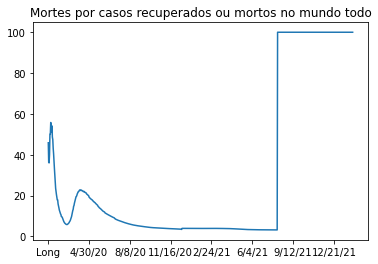

In [81]:
grouped_per_day["letality_rate_2"].plot()
plt.title("Mortes por casos recuperados ou mortos no mundo todo")
plt.show()

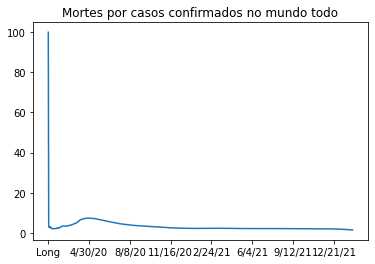

In [82]:
grouped_per_day["letality_rate_1"].plot()
plt.title("Mortes por casos confirmados no mundo todo")
plt.show()